In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import MinMaxScaler

In [2]:
# from tf.keras.models import Sequential # This does not work!
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Input, Dense, GRU, Embedding
from tensorflow.python.keras.optimizers import RMSprop
from tensorflow.python.keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau

# ModelCheckpoint

In [3]:
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, \
    TimeSeriesResampler
from tslearn.utils import to_time_series
from tslearn.utils import to_time_series_dataset
from tslearn.datasets import UCR_UEA_datasets
from tslearn.clustering import TimeSeriesKMeans

In [4]:
from matplotlib import font_manager, rc
import matplotlib

#한글 폰트 등록
font_location = "c:/Windows/fonts/malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [5]:
# import pandas as pd

# # 판다스 데이터프레임(DataFrame)을 출력할 때, 최대 출력할 수 있는 컬럼을 100개로 늘려줍니다.
# # 이렇게 해야 데이터를 분석할 때 출력해서 확인하기 편합니다.
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [6]:
# train = pd.read_csv('C:/Users/KIHyuk/Desktop/전력수요예측/train.csv')
# test = pd.read_csv('C:/Users/KIHyuk/Desktop/전력수요예측/test.csv')

In [7]:
# weather_time = pd.read_csv('C:/Users/KIHyuk/Desktop/전력수요예측/인천_시간별_기상자료.csv',encoding='euc-kr',index_col='일시',parse_dates=True)
# del weather_time['지점']

In [8]:
# for k in range(1,len(train.columns) ): #시간을 제외한 1열부터 마지막 열까지를 for문으로 작동시킵니다.
#     train_median=train.iloc[:,k].median() #값을 대체하는 과정에서 값이 변경 될 것을 대비해 해당 세대의 중앙값을 미리 계산하고 시작합니다.
#     counting=train.loc[ train.iloc[:,k].isnull()==False ][ train.columns[k] ].index

#     df=pd.DataFrame( list( zip( counting[:-1], counting[1:] - counting[:-1] -1  ) ), columns=['index','count'] )
    
#     df2= df[ (df['count'] > 0) ] #결측치가 존재하는 부분만 추출
#     df2=df2.reset_index(drop=True) #기존에 존재하는 index를 초기화 하여 이후 for문에 사용함

#     for i,j in zip( df2['index'], df2['count'] ) : # i = 해당 세대에서 값이 존재하는 index, j = 현재 index 밑의 결측치 갯수
#         if train.iloc[i,k]>=train_median: #현재 index에 존재하는 값이 해당 세대의 중앙 값 이상일때만 분산처리 실행
#             train.iloc[ i : i+j+1 , k] = train.iloc[i,k] / (j+1) 
#             #현재 index 및 결측치의 갯수 만큼 지정을 하여, 현재 index에 있는 값을 해당 갯수만큼 나누어 줍니다
#         else:
#             pass
#             #현재 index에 존재하는 값이 중앙 값 미만이면 pass를 실행
#     if k%50==0: #for문 진행정도 확인용
#             print(k,"번째 실행중")

In [9]:
# for k in range(1,len(test.columns) ): #시간을 제외한 1열부터 마지막 열까지를 for문으로 작동시킵니다.
#     test_median=test.iloc[:,k].median() #값을 대체하는 과정에서 값이 변경 될 것을 대비해 해당 세대의 중앙값을 미리 계산하고 시작합니다.
#     counting=test.loc[ test.iloc[:,k].isnull()==False ][ test.columns[k] ].index

#     df=pd.DataFrame( list( zip( counting[:-1], counting[1:] - counting[:-1] -1  ) ), columns=['index','count'] )
    
#     df2= df[ (df['count'] > 0) ] #결측치가 존재하는 부분만 추출
#     df2=df2.reset_index(drop=True) #기존에 존재하는 index를 초기화 하여 이후 for문에 사용함

#     for i,j in zip( df2['index'], df2['count'] ) : # i = 해당 세대에서 값이 존재하는 index, j = 현재 index 밑의 결측치 갯수
#         if test.iloc[i,k]>=test_median: #현재 indetestx에 존재하는 값이 해당 세대의 중앙 값 이상일때만 분산처리 실행
#             test.iloc[ i : i+j+1 , k] = test.iloc[i,k] / (j+1) 
#             #현재 index 및 결측치의 갯수 만큼 지정을 하여, 현재 index에 있는 값을 해당 갯수만큼 나누어 줍니다
#         else:
#             pass
#             #현재 index에 존재하는 값이 중앙 값 미만이면 pass를 실행
#     if k%50==0: #for문 진행정도 확인용
#             print(k,"번째 실행중")

In [10]:
# train['Time'] = train['Time'].apply(pd.to_datetime)
# train.set_index('Time',inplace=True)

# test['Time'] = test['Time'].apply(pd.to_datetime)
# test.set_index('Time',inplace=True)

In [11]:
# train_sample = train['2018-02-15':]
# train_sample = train_sample.interpolate(method='values')

# test_sample = test['2018-02-15':]
# test_sample = test_sample.interpolate(method='values')

In [12]:
# #결측값 가진 행 제거 - 데이터가 아예 없는 경우
# train_sample.loc[:,train_sample.isnull().sum() >= 1].columns

In [13]:
# #결측값 가진 행 제거 - 데이터가 아예 없는 경우
# test_sample.loc[:,test_sample.isnull().sum() >= 1].columns

In [14]:
# train_sample.drop(['X4', 'X127', 'X9', 'X65', 'X54', 'X13', 'X53', 'X24', 'X17', 'X14',
#        'X48', 'X2', 'X19', 'X36', 'X28', 'X63', 'X38', 'X39', 'X8', 'X64',
#        'X29', 'X57', 'X705', 'X71', 'X3', 'X27', 'X22', 'X21', 'X118', 'X6',
#        'X45', 'X40', 'X66', 'X52', 'X12', 'X49', 'X1', 'X33', 'X60', 'X46',
#        'X963', 'X56', 'X15', 'X11', 'X25', 'X34', 'X23', 'X58'], axis=1, inplace=True)

# test_sample.drop(['X26', 'X16', 'X7', 'X18', 'X41', 'X55', 'X5', 'X43', 'X59', 'X10',
#        'X62', 'X61', 'X32', 'X31', 'X30', 'X51', 'X35', 'X44', 'X37', 'X42',
#        'X50', 'X47', 'X20'],axis=1,inplace=True)

> 입력신호 추가

In [15]:
# train_sample['temp'] = weather_time['기온(°C)']['2018-02-15':'2018-06-30'] 
# train_sample['humidity'] = weather_time['습도(%)']['2018-02-15':'2018-06-30'] 
# train_sample[['temp','humidity']] = train_sample[['temp','humidity']].interpolate(method='values')  # 온도 결측값을 시간에 따른 보간법으로 채움
# train_sample['Day'] = train_sample.index.dayofyear
# train_sample['Hour'] = train_sample.index.hour




# test_sample['temp'] = weather_time['기온(°C)']['2018-02-15':'2018-06-30']
# test_sample['humidity'] = weather_time['습도(%)']['2018-02-15':'2018-06-30'] 
# test_sample[['temp','humidity']] = test_sample[['temp','humidity']].interpolate(method='values')  # 온도 결측값을 시간에 따른 보간법으로 채움
# test_sample['Day'] = test_sample.index.dayofyear
# test_sample['Hour'] = test_sample.index.hour

In [16]:
# train_sample.to_csv('train_sample_addFeature')
# test_sample.to_csv('test_sample_addFeature')

> Input 형식

>  (전체세대시간, 24시간, 2 )

In [65]:
train_sample = pd.read_csv('train_sample_addFeature',index_col='Time',parse_dates=True)
test_sample = pd.read_csv('test_sample_addFeature',index_col='Time',parse_dates=True)

In [18]:
from sklearn.preprocessing import MinMaxScaler

sc_train = MinMaxScaler() # trainSet scaler
sc_test = MinMaxScaler() # testSet scaler
sc_temp = MinMaxScaler() # temp scaler
sc_humidity = MinMaxScaler()

train_sample_sc = sc_train.fit_transform(train_sample.iloc[:,:-4])
test_sample_sc = sc_test.fit_transform(test_sample.iloc[:,:-4])
temp_sc = sc_temp.fit_transform(train_sample[['temp']])
humidity_sc = sc_humidity.fit_transform(train_sample[['humidity']])
day_sc = sc_temp.fit_transform(train_sample[['Day']])
hour_sc = sc_temp.fit_transform(train_sample[['Hour']])


train_sample_sc = np.concatenate((train_sample_sc, temp_sc), axis=1)
train_sample_sc = np.concatenate((train_sample_sc, day_sc), axis=1)
train_sample_sc = np.concatenate((train_sample_sc, hour_sc), axis=1)
train_sample_sc = np.concatenate((train_sample_sc, humidity_sc), axis=1)




test_sample_sc = np.concatenate((test_sample_sc, temp_sc), axis=1)
test_sample_sc = np.concatenate((test_sample_sc, day_sc), axis=1)
test_sample_sc = np.concatenate((test_sample_sc, hour_sc), axis=1)
test_sample_sc = np.concatenate((test_sample_sc, humidity_sc), axis=1)

C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [19]:
train_sample = pd.DataFrame(train_sample_sc, columns=train_sample.columns,index=train_sample.index)
test_sample = pd.DataFrame(test_sample_sc, columns=test_sample.columns,index=test_sample.index)

In [20]:
shift_step = 24

In [21]:
train_sample[['X692','temp','Day','Hour','humidity']].values[:-shift_step].shape

(3240, 5)

In [22]:
tmp_list = [] 
for i in train_sample.columns[:-4]:
    tmp_list.append(train_sample[[i,'temp','Day','Hour','humidity']].values[:-shift_step].reshape(135,24,5)) 

to_formatted_x = np.array(tmp_list)

In [23]:
res_x = to_formatted_x.reshape(to_formatted_x.shape[0]*to_formatted_x.shape[1],24,5)

res_x.shape

(169020, 24, 5)

In [24]:
for_shifting_y = train_sample.shift(-24)
# for_shifting_y=for_shifting_y.dropna()

tmp_shift_list = []
for i in train_sample.columns[:-4]:
    tmp_shift_list.append(for_shifting_y[i].values[:-shift_step].reshape(135,24,1))

to_formatted_y = np.array(tmp_shift_list)

In [25]:
res_y = to_formatted_y.reshape(to_formatted_x.shape[0]*to_formatted_x.shape[1],24,1)

res_y.shape

(169020, 24, 1)

In [26]:
############################################### TEST DATA #############################################################

In [27]:
tmp_test_list = [] 
for i in test_sample.columns[:-4]:
    tmp_test_list.append(test_sample[[i,'temp','Day','Hour','humidity']].values[:-shift_step].reshape(135,24,5)) 

to_formatted_test_x = np.array(tmp_test_list)

In [28]:
res_test_x = to_formatted_test_x.reshape(to_formatted_test_x.shape[0]*to_formatted_test_x.shape[1],24,5)

res_test_x.shape

(23895, 24, 5)

In [29]:
for_shifting_y = test_sample.shift(-24)

tmp_test_shift_list = []
for i in test_sample.columns[:-4]:
    tmp_test_shift_list.append(for_shifting_y[i].values[:-shift_step].reshape(135,24,1))

to_formatted_test_y = np.array(tmp_test_shift_list)

In [30]:
# to_formatted_test_y.shape

In [31]:
res_test_y = to_formatted_test_y.reshape(to_formatted_test_x.shape[0]*to_formatted_test_x.shape[1],24,1)

res_test_y.shape

(23895, 24, 1)

In [32]:
from keras.layers import LSTM 
from keras.models import Sequential 
from keras.layers import Dense 
import keras.backend as K 
from keras.callbacks import EarlyStopping 
from keras.layers import TimeDistributed
K.clear_session()

model = Sequential() # Sequeatial Model 
model.add(LSTM(128, input_shape=(24, 5),return_sequences=True)) # (timestep, feature)
model.add(TimeDistributed(Dense(1, activation="linear")))
model.compile(loss='mean_squared_error', optimizer='adam') 
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 24, 128)           68608     
_________________________________________________________________
time_distributed_1 (TimeDist (None, 24, 1)             129       
Total params: 68,737
Trainable params: 68,737
Non-trainable params: 0
_________________________________________________________________


In [33]:
# 모델 학습
early_stop = EarlyStopping(monitor='loss',patience=4, verbose=1)

history = model.fit(res_x,res_y,epochs=15,batch_size=1024,verbose=1,validation_split=0.2,shuffle=True,callbacks=[early_stop])


Train on 135216 samples, validate on 33804 samples
Epoch 1/15
135216/135216 [==============================] - 75s 553us/step - loss: 0.0178 - val_loss: 0.0134
Epoch 2/15
135216/135216 [==============================] - 75s 552us/step - loss: 0.0133 - val_loss: 0.0126
Epoch 3/15
135216/135216 [==============================] - 75s 552us/step - loss: 0.0127 - val_loss: 0.0123
Epoch 4/15
135216/135216 [==============================] - 72s 533us/step - loss: 0.0125 - val_loss: 0.0122
Epoch 5/15
135216/135216 [==============================] - 74s 548us/step - loss: 0.0123 - val_loss: 0.0120
Epoch 6/15
135216/135216 [==============================] - 71s 528us/step - loss: 0.0122 - val_loss: 0.0120
Epoch 7/15
135216/135216 [==============================] - 73s 539us/step - loss: 0.0122 - val_loss: 0.0119
Epoch 8/15
135216/135216 [==============================] - 73s 538us/step - loss: 0.0121 - val_loss: 0.0118
Epoch 9/15
135216/135216 [==============================] - 75s 558us/step -

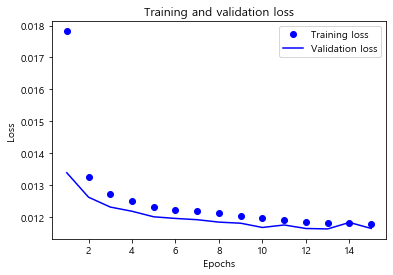

In [34]:
history_dict = history.history
history_dict.keys()

import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')# ‘bo’는 파란색 점
plt.plot(epochs, val_loss, 'b', label='Validation loss')# ‘b’는 파란색 실선
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [35]:
pred = model.predict(res_test_x)

In [36]:
## to inverse minmax scale

col_list = test_sample.columns.insert(0,'임시')
tt_index = test_sample[:'2018-06-29-23:00:00'].index

test_inverse_df = pd.DataFrame()

for i in range(1,len(test_sample.columns)-3):# temp col 제외
    tmp = i*3240
    tt = pred.reshape(573480,1)[tmp-3240:tmp]    
    test_inverse_df[col_list[i]] = tt.reshape(3240,)
    
test_inverse_df = test_inverse_df.set_index(tt_index)
test_inverse_df_array = sc_test.inverse_transform(test_inverse_df)

In [37]:
# inverse minmax scale DataFrame 

res_test_df = pd.DataFrame(test_inverse_df_array, columns=test_inverse_df.columns,index=tt_index)

In [38]:
# 예측한 결과물 DataFrame
# res_test_df

In [39]:
# 결과물과 원본 DataFrame 모두 inverse scaling 

In [62]:
test_none_scale = pd.read_csv('test_sample',index_col='Time',parse_dates=True)

In [64]:
test_none_scale = test_none_scale.loc[:,:'X230'].shift(-24).dropna()

> 결과 체크

In [42]:
test_sample.columns

Index(['X303', 'X241', 'X435', 'X402', 'X352', 'X305', 'X350', 'X326', 'X299',
       'X160',
       ...
       'X266', 'X443', 'X347', 'X75', 'X107', 'X230', 'temp', 'humidity',
       'Day', 'Hour'],
      dtype='object', length=181)

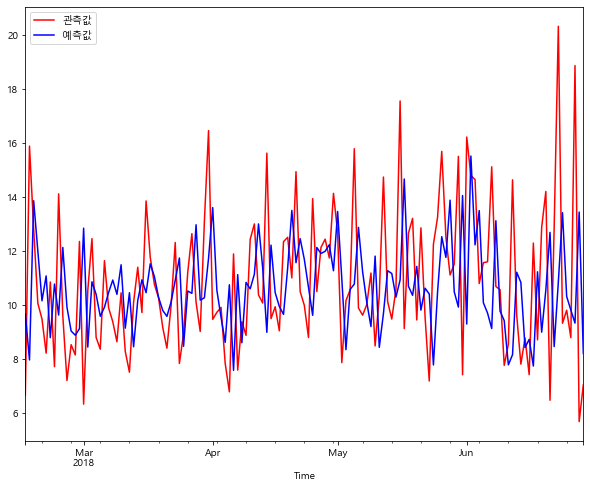

In [82]:
# 일별

test_none_scale['X303'].resample('D').sum().plot(figsize=(10,8),color='red',label='관측값')
res_test_df['X303'].resample('D').sum().plot(figsize=(10,8),color='blue',label='예측값')
plt.legend()

In [50]:
test_none_scale.resample('D').sum()

,X303,X241,X435,X402,X352,X305,X350,X326,X299,X160,X125,X211,X349,X407,X330,X132,X231,X225,X286,X354,X353,X76,X255,X106,X393,X157,X323,X130,X269,X94,X172,X289,X216,X123,X398,X233,X214,X270,X371,X200,X111,X163,X364,X378,X271,X462,X427,X73,X263,X450,...,X302,X314,X124,X405,X315,X176,X396,X449,X383,X473,X205,X161,X403,X341,X149,X82,X377,X232,X333,X140,X422,X386,X80,X250,X142,X235,X446,X331,X102,X186,X243,X194,X183,X139,X459,X457,X70,X368,X282,X426,X192,X283,X329,X223,X266,X443,X347,X75,X107,X230
Time,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-02-15,6.6690,12.766,8.157,4.6675,2.0490,10.749,5.2980,1.0175,6.4185,9.150,3.814,5.828,6.438,7.7780,5.283,8.904,5.5910,7.4260,5.7070,1.7770,8.6040,2.138,12.377,11.429,7.9305,4.3500,7.0290,13.5080,10.132,2.479,3.485,4.355,7.3490,6.329,6.032,2.711,6.473,7.708,11.675,3.631,3.682,2.9870,2.570,9.6855,6.5950,8.1710,3.2320,0.205,6.2410,9.7530,...,3.114000,9.4690,5.326,2.7760,6.716,1.6690,3.5080,4.2990,4.3950,4.897,6.5710,12.625,2.7530,4.9890,7.337,5.771,2.4890,10.5160,6.9150,4.7010,8.439,9.4390,249.757,16.273,3.1720,3.7340,6.7460,11.6660,14.861,10.4720,4.7520,10.313,5.5220,7.4210,2.2615,4.225,2.406,7.265,3.5870,4.9120,2.600,3.3260,1.351,8.134,12.479,3.929,4.682,9.195,0.960,7.159
2018-02-16,15.8830,8.632,8.289,4.7200,3.2790,11.245,7.2190,0.6110,6.0720,6.692,3.858,8.154,7.083,11.5380,7.679,6.317,8.0860,9.6640,5.7410,5.9130,5.6610,56.067,9.852,11.628,8.5395,4.9050,6.2690,12.7760,10.418,2.681,2.564,9.850,6.7920,6.217,5.462,2.713,9.350,10.645,10.053,4.135,3.681,8.0080,5.460,9.2000,4.8390,5.9340,9.4975,0.205,9.0600,5.5090,...,3.339000,10.1620,5.949,4.3920,7.051,4.1150,1.6960,7.7780,3.9490,4.910,10.0860,9.905,4.7430,6.0190,9.663,9.319,2.5300,14.2970,3.4630,8.3970,9.638,6.7685,376.046,11.776,5.4520,4.5070,8.1130,9.6400,7.470,5.4620,8.6170,8.700,4.5870,8.7750,3.0300,3.916,2.365,8.336,3.9420,1.7445,7.800,2.3900,6.119,8.208,11.788,6.298,3.136,49.286,0.962,12.536
2018-02-17,12.8250,9.607,8.148,9.9785,3.0010,14.067,8.0840,0.8845,4.8630,8.079,3.850,7.058,7.826,11.9790,9.603,9.215,7.3990,10.7400,7.2780,4.8075,5.6530,101.727,9.361,11.750,7.9465,5.0990,4.8805,19.7610,7.727,2.492,1.674,10.826,11.8140,6.281,5.591,2.698,12.240,11.106,9.063,4.052,3.663,9.5840,4.444,11.0930,8.2140,4.9150,9.4100,0.205,8.5800,8.0725,...,3.115500,10.9880,5.443,4.4370,6.510,8.1260,6.8910,5.7650,4.2870,4.570,11.0860,11.886,5.4690,6.9490,9.267,5.907,2.5180,11.5490,7.7170,8.1040,8.584,7.8015,255.228,11.077,15.4000,4.1990,5.8650,9.4090,7.335,4.5970,9.8760,10.176,4.4090,12.0160,3.3950,7.100,2.375,7.653,3.7330,6.8140,12.923,3.3750,6.856,9.494,9.684,6.179,3.720,112.013,1.061,10.480
2018-02-18,10.0700,9.509,8.803,8.5900,4.6050,12.318,7.3890,0.7155,4.0750,7.765,74.346,7.571,5.657,9.3150,6.481,5.859,5.0180,8.9630,9.2490,3.3120,6.1040,2.311,8.610,18.796,7.2360,5.1350,5.4210,15.5980,7.781,2.479,2.170,9.296,9.5260,37.404,5.905,4.397,10.254,6.883,11.119,4.278,22.538,9.1320,3.669,7.1350,7.8560,7.6900,9.7020,0.204,6.3250,7.6490,...,3.116500,9.8720,102.574,5.9780,6.457,6.2840,3.5090,6.7250,3.4830,3.428,11.6930,10.854,4.1110,1.6395,8.993,58.901,2.4400,11.1730,5.4410,11.4520,8.148,6.1740,209.072,11.563,14.2800,3.3020,8.1310,5.8730,80.654,9.0130,10.5210,7.973,5.3990,13.0750,3.7990,6.497,83.260,8.641,3.4570,11.4880,12.417,6.1800,4.486,9.429,8.260,6.904,5.768,9.228,37.654,10.292
2018-02-19,9.4835,8.622,8.562,7.4740,3.8520,8.701,7.5330,3.5960,4.0740,8.770,53.172,7.333,13.230,12.5345,7.008,7.434,5.7500,9.7000,10.3330,3.1255,5.4560,21.253,7.775,17.389,8.6030,4.8840,5.1530,11.0620,6.515,2.548,2.390,8.123,5.0100,47.139,4.024,14.829,10.301,8.690,10.928,4.080,15.742,8.1850,4.066,6.7170,7.3830,4.3740,10.1310,0.223,5.6480,7.4830,...,3.034000,6.9710,68.360,4.7115,6.455,6.7970,3.8300,7.4730,4.6710,4.521,7.7370,12.516,4.2430,3.5680,8.060,46.962,2.3930,10.0070,6.7680,8.3210,7.755,6.1780,194.701,10.180,13.8240,4.1460,8.1890,6.0490,32.540,9.5640,9.8130,6.849,5.4720,10.2130,3.7820,4.731,67.051,7.814,3.4920,12.1250,10

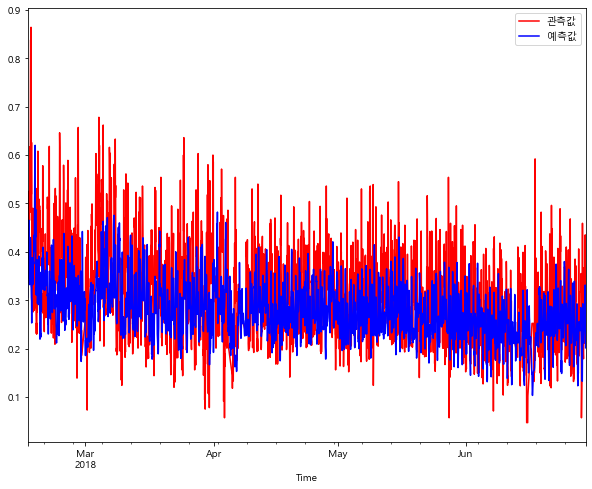

In [47]:
# 시간별 

test_none_scale['X241'].plot(figsize=(10,8),color='red',label='관측값')
res_test_df['X241'].plot(figsize=(10,8),color='blue',label='예측값')
plt.legend()